In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
titanic= sns.load_dataset ('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Explore dataset structure and check for missing values
print(titanic.info())
print(titanic.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
survived         0
pclass           0
sex              0
age            17

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

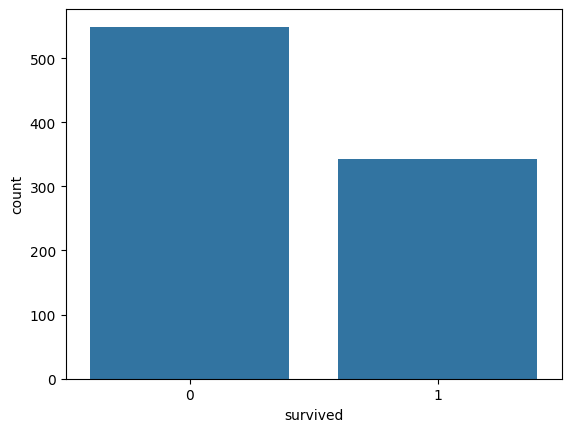

In [ ]:
# Visualize relationships between key features and target variable
sns.countplot(x='survived', data=titanic)
plt.show()


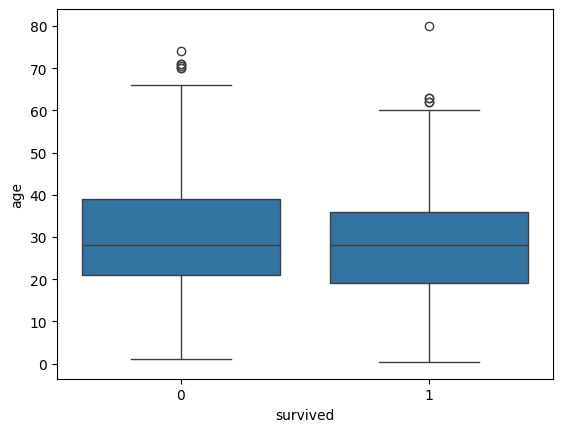

In [ ]:
sns.boxplot(x='survived', y='age', data=titanic)
plt.show()

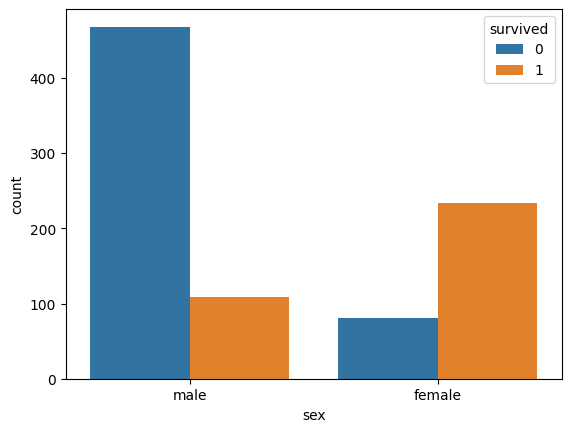

In [ ]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.show()

In [ ]:
# Handle missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic.drop(columns=['deck'], inplace=True)
titanic.dropna(subset=['embark_town'], inplace=True)

<ipython-input-8-97915293c25e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
<ipython-input-8-97915293c25e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


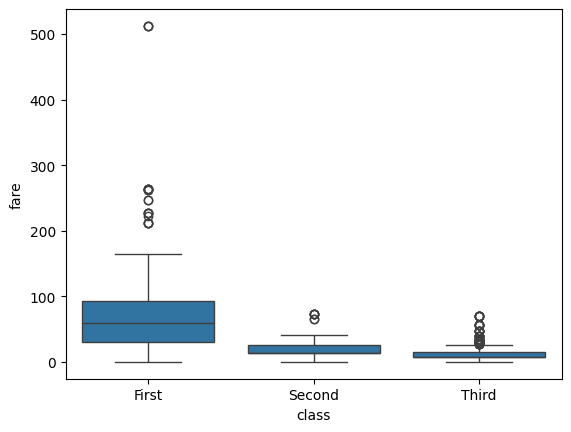

In [ ]:
sns.boxplot(x='class', y='fare', data=titanic)
plt.show()

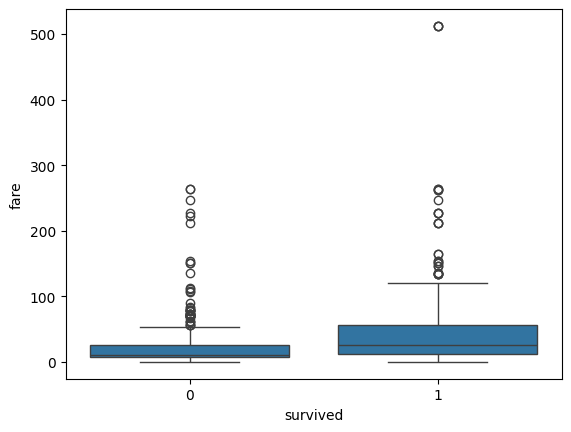

In [ ]:
sns.boxplot(x='survived', y='fare', data=titanic)
plt.show()

In [ ]:
# Feature Engineering
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


In [ ]:
def age_category(age):
    if age <= 12:
        return 'child'
    elif age <= 18:
        return 'teenager'
    elif age <= 60:
        return 'adult'
    else:
        return 'senior'


In [ ]:
titanic['age_group'] = titanic['age'].apply(age_category)

In [ ]:
titanic['fare_group'] = pd.qcut(titanic['fare'], 4, labels=['low', 'medium', 'high', 'very high'])

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,age_group,fare_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2,adult,low
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2,adult,very high
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1,adult,medium
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2,adult,very high
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,adult,medium


In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['sex', 'embarked', 'age_group', 'fare_group']

In [ ]:
for col in categorical_cols:
    le = LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])
    label_encoders[col] = le

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,age_group,fare_group
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False,2,0,1
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False,2,0,3
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True,1,0,2
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False,2,0,3
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True,1,0,2


In [ ]:
print(label_encoders['sex'].classes_)
print(label_encoders['embarked'].classes_)
print(label_encoders['age_group'].classes_)
print(label_encoders['fare_group'].classes_)

['female' 'male']
['C' 'Q' 'S']
['adult' 'child' 'senior' 'teenager']
['high' 'low' 'medium' 'very high']


In [ ]:
# Select relevant features
features = ['pclass', 'sex', 'age', 'fare', 'embarked', 'family_size', 'age_group', 'fare_group']
target = 'survived'
X = titanic[features]
y = titanic[target]


In [ ]:
# Scale numerical features
scaler = StandardScaler()
X[['age', 'fare', 'family_size']] = scaler.fit_transform(X[['age', 'fare', 'family_size']])


<ipython-input-24-64925c0a583c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'fare', 'family_size']] = scaler.fit_transform(X[['age', 'fare', 'family_size']])


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.7790262172284644
Confusion Matrix:
 [[136  31]
 [ 28  72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       167
           1       0.70      0.72      0.71       100

    accuracy                           0.78       267
   macro avg       0.76      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267

